# Graph Creation
Here, we build a network between the stocks, using their sectors and fundamentals correlation.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans

In [12]:
stocks = pd.read_csv('../data/raw/stocks.csv').set_index('Symbol')
stocks.head(n=10)

,Name,Sector
Symbol,,
AAPL,Apple Inc.,Information Technology
ABBV,AbbVie,Health Care
ABT,Abbott Laboratories,Health Care
ACN,Accenture,Information Technology
ADBE,Adobe Inc.,Information Technology
AIG,American International Group,Financials
AMD,Advanced Micro Devices,Information Technology
AMGN,Amgen,Health Care
AMT,American Tower,Real Estate


We create a graph of the stocks linking every stock that belong to the same activity sector.

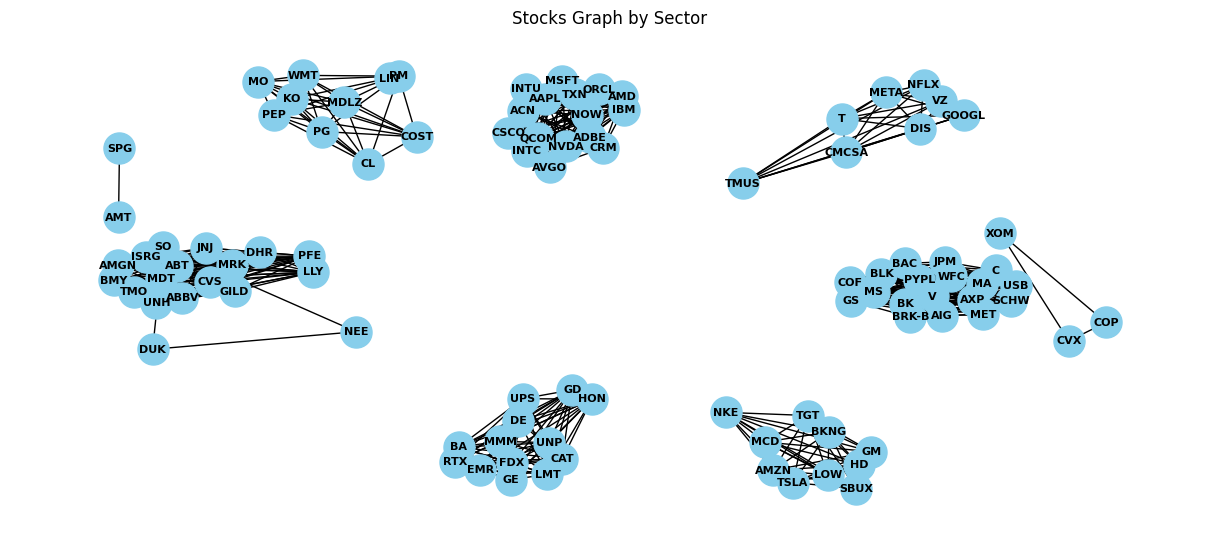

In [13]:
adj_stocks = np.array([
	[stocks.loc[stock1, 'Sector'] == stocks.loc[stock2, 'Sector'] * (stock1 != stock2) for stock1 in stocks.index] for stock2 in stocks.index
]).astype(int)
stocks_graph = nx.from_numpy_array(adj_stocks)
stocks_graph = nx.relabel_nodes(stocks_graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(stocks_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(stocks_graph, k=.5))
plt.title('Stocks Graph by Sector')
plt.show()

In [14]:
fundamentals = pd.read_csv('../data/raw/fundamentals.csv').set_index("Symbol")
fundamentals.head(n=10)

,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,4.188243,-0.085926,0.095466,0.322552,-0.182787,-0.212539,-0.101824,-0.479004,0.299774,-1.035468,0.280011,1.635441,0.852280,0.729941
ABBV,-0.081897,0.841493,-0.234084,-9.766269,-0.549436,-0.036819,-0.101933,5.088861,-1.105441,1.014741,-0.161309,-0.339436,0.413630,-1.235340
ABT,-0.283251,-0.236353,-0.098688,0.088227,-0.152881,-0.357440,-0.101306,-0.298114,-0.652995,-0.291085,-0.286400,-0.321110,-0.084728,1.155834
ACN,-0.354063,-0.199646,-0.238607,0.091824,0.097732,0.052421,-0.100861,-0.069430,0.740250,-0.455101,-1.383047,-0.355842,-0.649161,-0.633429
ADBE,-0.369018,-0.194961,-0.266114,0.125402,0.329803,0.350502,-0.101333,-0.638744,1.247756,-1.294110,-1.451712,-0.378626,0.143354,0.995599
AIG,-0.485781,-0.241955,-0.374588,0.073433,-0.308991,-0.286140,-0.100350,-0.278366,-0.676934,0.055874,-0.341616,-0.381630,-0.787284,-0.577158
AMD,-0.045864,0.771404,0.495722,0.101098,-0.529698,-0.360200,-0.101146,-0.638744,2.214889,-1.369810,2.322025,1.905945,1.695546,-0.757551
AMGN,-0.347478,-0.172069,-0.314149,0.169887,0.103115,0.356022,-0.101636,0.246076,-1.170076,0.566849,-0.656099,-0.462437,0.104545,0.047227
AMT,-0.438412,-0.141497,-0.044322,0.167902,-0.254562,-0.282460,-0.101751,0.613699,-0.246034,0.339749,-0.987908,-0.438778,1.458707,0.832104


In [16]:
fundamentals_corr = fundamentals.transpose().corr(method="spearman")
fundamentals_corr = (fundamentals_corr - (fundamentals_corr == 1))  # Remove self-correlation
fundamentals_corr.head(n=10)

Symbol,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,...,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000000,-0.476923,0.283516,-0.336264,0.147253,-0.648352,0.529670,-0.573626,-0.151648,0.621978,...,-0.037363,-0.248352,-0.037363,-0.551648,-0.213187,0.564835,-0.200000,0.349451,0.226374,-0.186813
ABBV,-0.476923,0.000000,-0.318681,-0.243956,-0.494505,0.239560,-0.226374,0.402198,0.164835,-0.428571,...,0.015385,-0.006593,-0.318681,0.226374,-0.151648,-0.384615,0.191209,-0.582418,0.006593,0.230769
ABT,0.283516,-0.318681,0.000000,-0.257143,0.200000,0.019780,-0.173626,0.156044,0.538462,-0.195604,...,0.393407,-0.129670,0.309890,-0.463736,0.019780,0.635165,-0.006593,0.054945,-0.081319,-0.094505
ACN,-0.336264,-0.243956,-0.257143,0.000000,0.481319,0.301099,-0.120879,0.112088,-0.103297,0.085714,...,-0.085714,0.604396,0.292308,0.586813,0.221978,-0.283516,0.002198,-0.213187,-0.094505,0.098901
ADBE,0.147253,-0.494505,0.200000,0.481319,0.000000,-0.336264,-0.059341,0.046154,0.208791,-0.090110,...,0.243956,0.116484,0.775824,-0.050549,0.230769,0.397802,-0.463736,-0.081319,-0.617582,-0.547253
AIG,-0.648352,0.239560,0.019780,0.301099,-0.336264,0.000000,-0.397802,0.520879,0.054945,-0.301099,...,-0.063736,0.476923,-0.142857,0.573626,0.257143,-0.397802,0.665934,-0.046154,0.213187,0.670330
AMD,0.529670,-0.226374,-0.173626,-0.120879,-0.059341,-0.397802,0.000000,-0.749451,-0.459341,0.731868,...,-0.349451,-0.283516,-0.336264,-0.314286,-0.437363,0.072527,-0.468132,0.248352,0.389011,-0.358242
AMGN,-0.573626,0.402198,0.156044,0.112088,0.046154,0.520879,-0.749451,0.000000,0.573626,-0.841758,...,0.424176,0.393407,0.393407,0.410989,0.331868,-0.041758,0.393407,-0.494505,-0.432967,0.380220
AMT,-0.151648,0.164835,0.538462,-0.103297,0.208791,0.054945,-0.459341,0.573626,0.000000,-0.723077,...,0.942857,-0.235165,0.635165,0.182418,0.547253,0.085714,0.112088,-0.208791,-0.613187,-0.081319


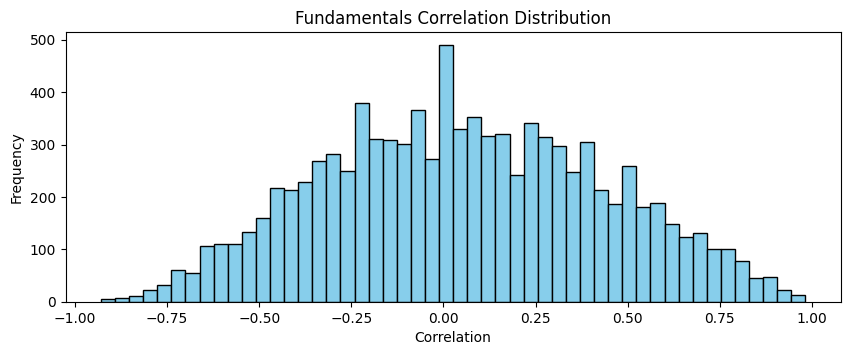

In [17]:
plt.figure(figsize=(10, 3.5))
plt.hist(fundamentals_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Fundamentals Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

We use the correlation between the fundamental data to link the stocks that have a high correlation.

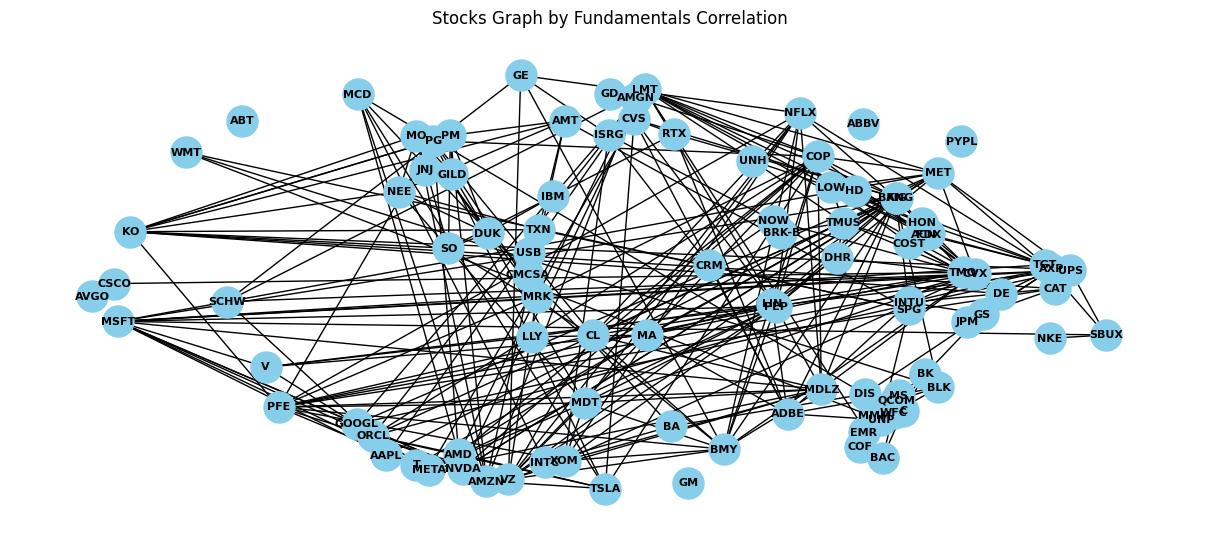

In [18]:
fundamentals_corr_np = fundamentals_corr.to_numpy()
adj_fundamentals_corr = (fundamentals_corr_np * (abs(fundamentals_corr_np) > .7).astype(int))

fundamentals_corr_graph = nx.from_numpy_array(adj_fundamentals_corr)
fundamentals_corr_graph = nx.relabel_nodes(fundamentals_corr_graph, dict(enumerate(fundamentals_corr.index)))

plt.figure(figsize=(12, 5))
nx.draw(fundamentals_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(fundamentals_corr_graph))
plt.title('Stocks Graph by Fundamentals Correlation')
plt.show()

We then build the final adjacency matrix by giving a correlation bonus to two stocks sharing the same sector

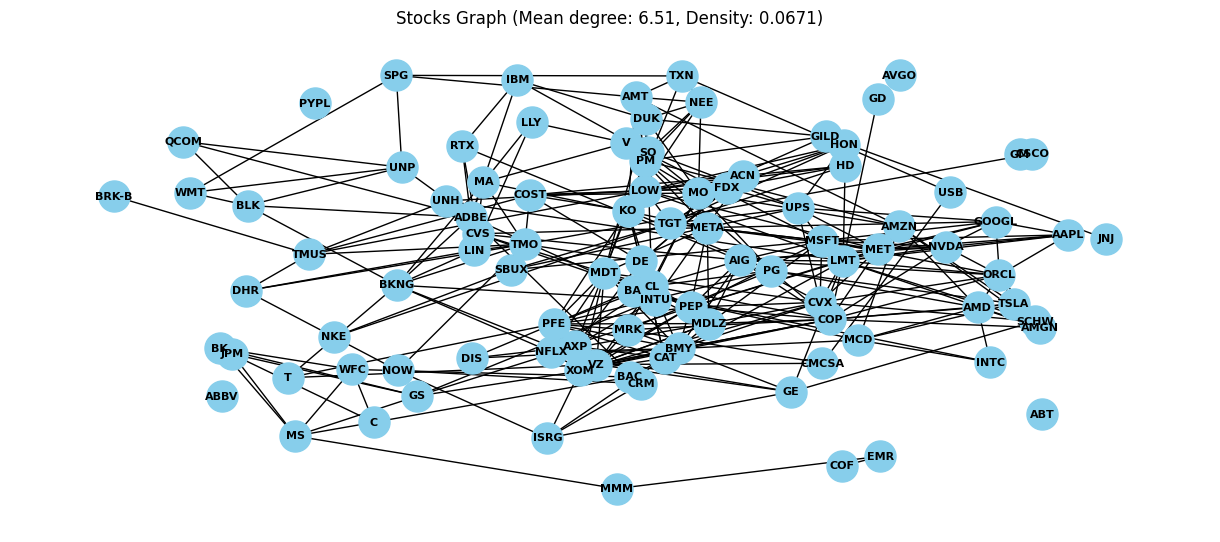

In [19]:
corr_threshold, sector_bonus = .7, .05

share_sector = pd.get_dummies(stocks[["Sector"]]).transpose().corr().to_numpy().astype(int) - np.eye(len(stocks), dtype=int)

adj = abs(fundamentals_corr_np) + share_sector * sector_bonus # GCNConv only accepts positive weights
adj = adj * (abs(adj) > corr_threshold)  
adj = adj / adj.max()

graph = nx.from_numpy_array(adj)
graph = nx.relabel_nodes(graph, dict(enumerate(stocks.index)))

plt.figure(figsize=(12, 5))
nx.draw(graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(graph, k=.5))
plt.title(f'Stocks Graph (Mean degree: {np.mean([degree for node, degree in graph.degree]):.2f}, Density: {nx.density(graph):.4f})')
plt.show()

In [20]:
np.save('../data/raw/adj.npy', adj)